<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


<Axes: xlabel='code_job', ylabel='income'>

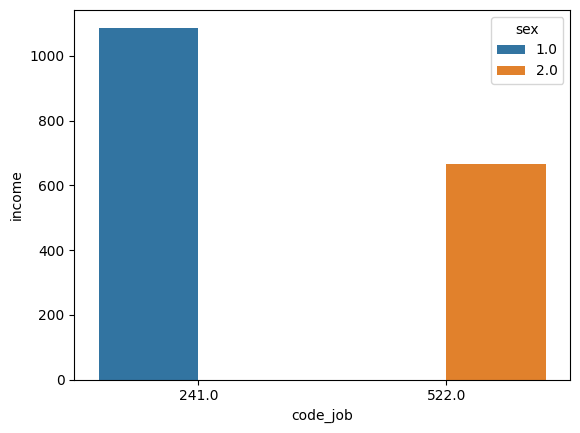

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
# 데이터 불러오기
raw_welfare = pd.read_spss('../Koweps_hpwc14_2019_beta2.sav')

# 복수본 만들기
welfare = raw_welfare.copy()

# 데이터 검토하기
welfare # 앞부분, 뒷부분 출력
welfare.shape # 행, 열 개수 출력
welfare.info() # 변수 속성 출력
welfare.describe() # 요약 통계량

welfare = welfare.rename(columns = {
    'h14_g3' : 'sex',
    'h14_g4' : 'birth',
    'h14_g10' : 'marriage_type',
    'h14_g11' : 'religion',
    'p1402_8aq1' : 'income',
    'h14_eco9' : 'code_job',
    'h14_reg7' : 'code_region'
})
# 성별과 직업 변수 선택
gender_job = welfare[['sex', 'code_job']]

# 성별과 직업별 개수 계산
gender_job_count = gender_job.groupby(['sex', 'code_job']).size().reset_index(name='count')

# 성별에 따른 가장 많은 직업별 평균 소득 계산
gender_job_income = welfare.groupby(['sex', 'code_job'])['income'].mean().reset_index()

# 성별에 따른 가장 많은 직업 추출
most_common_jobs = gender_job_income.groupby('sex')['income'].idxmax()
most_common_jobs = gender_job_income.loc[most_common_jobs]

# 시각화
sns.barplot(data=most_common_jobs, x= 'code_job', y='income', hue='sex')
